<a href="https://colab.research.google.com/github/EsraaMosaad/ASDC-AI-Data-analysis-internship/blob/main/Perform_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data Preprocessing**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


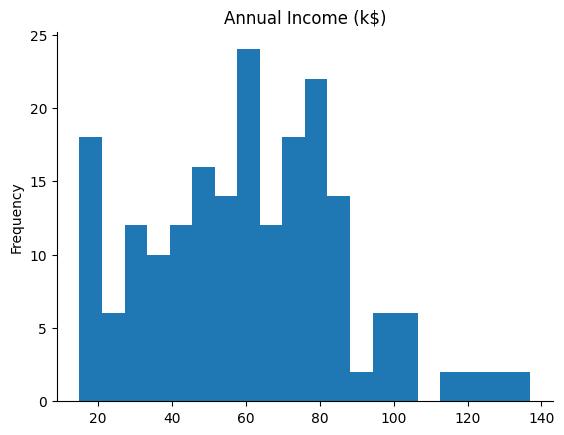

In [4]:
from matplotlib import pyplot as plt
data['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
# Map "Female" to 0 and "Male" to 1
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [8]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]>

# **PCA** used for dimensionality reduction and data visualization.

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
X=data.iloc[:,[1,2,3,4]]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [11]:
# Extract the feature names
feature_names = X.columns.tolist()

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

# Get the absolute loadings for each principal component
loadings = abs(pca.components_)

# Find the indices of the features with the highest loadings for each principal component
top_features_indices = loadings.argsort(axis=1)[:, ::-1][:, :2]

# Get the names of the features associated with the selected indices
selected_feature_names = [[feature_names[idx] for idx in indices] for indices in top_features_indices]

# Print the selected feature names for each principal component
for i, features in enumerate(selected_feature_names):
    print(f"Principal Component {i+1} features: {features}")

Principal Component 1 features: ['Spending Score (1-100)', 'Annual Income (k$)']
Principal Component 2 features: ['Annual Income (k$)', 'Spending Score (1-100)']


In [12]:
X_pca.shape

(200, 2)

# **Select how many clusters we have**

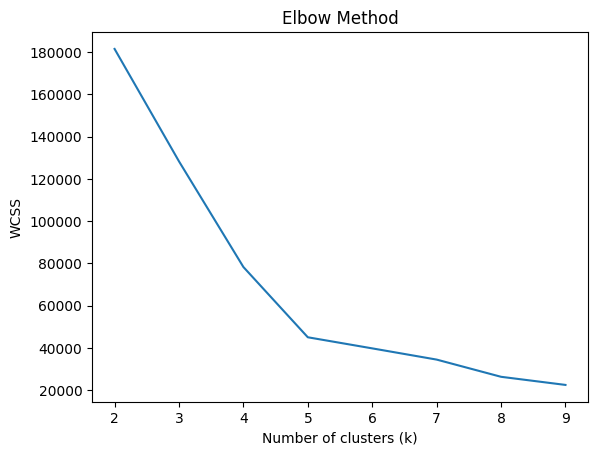

In [13]:
wcss = []
k_values = range(2, 10)  # Choose the range of k values

for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init="auto")
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # WCSS value for each k

# Plot the results
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# **Kmeans cluster**

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_pca)

In [15]:
# Get the cluster centers
centers = kmeans.cluster_centers_
# Get the cluster labels
labels = kmeans.labels_
# Plot the data points with color-coded clusters

# *Visualizing*

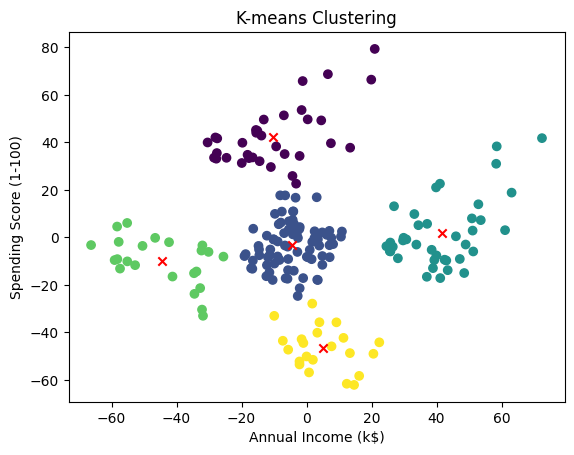

In [16]:


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')

plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.title('K-means Clustering')
plt.show()